# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

## Objectives
Hey! Great job getting through those challenging DataCamp courses. You're learning a lot in a short span of time. 

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the *slightly* messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

***This is the Tier 3 notebook, which means it's not filled in at all: we'll just give you the skeleton of a project, the brief and the data. It's up to you to play around with it and see what you can find out! Good luck! If you struggle, feel free to look at easier tiers for help; but try to dip in and out of them, as the more independent work you do, the better it is for your learning!***

This challenge will make use of only what you learned in the following DataCamp courses: 
- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One) 
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas

Of the tools, techniques and concepts in the above DataCamp courses, this challenge should require the application of the following: 
- **pandas**
    - **data ingestion and inspection** (pandas Foundations, Module One) 
    - **exploratory data analysis** (pandas Foundations, Module Two)
    - **tidying and cleaning** (Manipulating DataFrames with pandas, Module Three) 
    - **transforming DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **subsetting DataFrames with lists** (Manipulating DataFrames with pandas, Module One) 
    - **filtering DataFrames** (Manipulating DataFrames with pandas, Module One) 
    - **grouping data** (Manipulating DataFrames with pandas, Module Four) 
    - **melting data** (Manipulating DataFrames with pandas, Module Three) 
    - **advanced indexing** (Manipulating DataFrames with pandas, Module Four) 
- **matplotlib** (Intermediate Python for Data Science, Module One)
- **fundamental data types** (Data Types for Data Science, Module One) 
- **dictionaries** (Intermediate Python for Data Science, Module Two)
- **handling dates and times** (Data Types for Data Science, Module Four)
- **function definition** (Python Data Science Toolbox - Part One, Module One)
- **default arguments, variable length, and scope** (Python Data Science Toolbox - Part One, Module Two) 
- **lambda functions and error handling** (Python Data Science Toolbox - Part One, Module Four) 

## The Data Science Pipeline

This is Tier Three, so we'll get you started. But after that, it's all in your hands! When you feel done with your investigations, look back over what you've accomplished, and prepare a quick presentation of your findings for the next mentor meeting. 

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [5]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

from io import BytesIO # from Himanshu
import requests  # Deborah added when the error message said that requests was not defined

In [6]:
# code from Himanshu

url = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

response = requests.get(url)  # removed 'verify=False' per warning message and it works fine- it would Disable SSL verification (not recommended for security-sensitive tasks)

if response.status_code == 200:
    data = BytesIO(response.content)
    properties = pd.read_excel(data, sheet_name="Average price")
    print(properties.head())
else:
    print(f"Failed to download file. HTTP Status Code: {response.status_code}")


  Unnamed: 0 City of London Barking & Dagenham     Barnet     Bexley  \
0        NaT      E09000001          E09000002  E09000003  E09000004   
1 1995-01-01          90347              51870      98948      64956   
2 1995-02-01          81213              52513      98848      64786   
3 1995-03-01          78168              52701      97848      64366   
4 1995-04-01          76172              54618      96273      64276   

       Brent    Bromley     Camden    Croydon     Ealing  ... NORTH WEST  \
0  E09000005  E09000006  E09000007  E09000008  E09000009  ...  E12000002   
1      76880      83082     119775      70118      85469  ...      40907   
2      77651      83068     118365      69908      86551  ...      40877   
3      77644      82856     119131      69666      87067  ...      41351   
4      78668      82525     118948      69562      87933  ...      41195   

  YORKS & THE HUMBER EAST MIDLANDS WEST MIDLANDS EAST OF ENGLAND     LONDON  \
0          E12000003     E12000

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [8]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

# url_LondonHousePrices = r"https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# url_LondonHousePrices = r"C:\Users\dsh_m\Downloads\UK House price index.xlsx"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
#properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 



***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules. 
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [11]:
#properties.shape
#properties.info
properties.dtypes
# properties.columns

Unnamed: 0              datetime64[ns]
City of London                  object
Barking & Dagenham              object
Barnet                          object
Bexley                          object
Brent                           object
Bromley                         object
Camden                          object
Croydon                         object
Ealing                          object
Enfield                         object
Greenwich                       object
Hackney                         object
Hammersmith & Fulham            object
Haringey                        object
Harrow                          object
Havering                        object
Hillingdon                      object
Hounslow                        object
Islington                       object
Kensington & Chelsea            object
Kingston upon Thames            object
Lambeth                         object
Lewisham                        object
Merton                          object
Newham                   

In [12]:
properties.rename(columns = {'Unnamed: 0':'Date'},inplace = True)
print(properties.head(5))
# Demonstrate I can select a range of columns; useful for a brief print
#foo = properties.loc[:,'Date': "Brent"]
#foo.drop([0], inplace = True)
#print(foo.head())

        Date City of London Barking & Dagenham     Barnet     Bexley  \
0        NaT      E09000001          E09000002  E09000003  E09000004   
1 1995-01-01          90347              51870      98948      64956   
2 1995-02-01          81213              52513      98848      64786   
3 1995-03-01          78168              52701      97848      64366   
4 1995-04-01          76172              54618      96273      64276   

       Brent    Bromley     Camden    Croydon     Ealing  ... NORTH WEST  \
0  E09000005  E09000006  E09000007  E09000008  E09000009  ...  E12000002   
1      76880      83082     119775      70118      85469  ...      40907   
2      77651      83068     118365      69908      86551  ...      40877   
3      77644      82856     119131      69666      87067  ...      41351   
4      78668      82525     118948      69562      87933  ...      41195   

  YORKS & THE HUMBER EAST MIDLANDS WEST MIDLANDS EAST OF ENGLAND     LONDON  \
0          E12000003     E12000

**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [14]:
props = properties.transpose()
props.reset_index(inplace = True)

In [15]:
props.columns = props.iloc[0]
props.head()

,Date,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
0,Date,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
1,City of London,E09000001,90347,81213,78168,76172,83392,93757,108801,110976,...,892515,871986,860972,797832,745201,731341,713777,687104,680670,792499
2,Barking & Dagenham,E09000002,51870,52513,52701,54618,54524,55200,53569,53691,...,342817,344631,344640,342051,349225,347689,350143,351439,354980,355594
3,Barnet,E09000003,98948,98848,97848,96273,95737,95577,96992,97968,...,604879,608108,616911,620768,625383,628771,625476,622268,624855,616916
4,Bexley,E09000004,64956,64786,64366,64276,63995,64251,63721,64431,...,395095,396719,395600,400090,399746,404894,407291,409074,406843,403541


**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

In [17]:
# I had used the name Date above, now after the transpose, it's on the Boroughs colunm, and now the IDs are in a column
props.rename(columns = {'Date':'Boroughs', pd.NaT:'ID'},inplace = True)
props.head()

,Boroughs,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
0,Date,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
1,City of London,E09000001,90347,81213,78168,76172,83392,93757,108801,110976,...,892515,871986,860972,797832,745201,731341,713777,687104,680670,792499
2,Barking & Dagenham,E09000002,51870,52513,52701,54618,54524,55200,53569,53691,...,342817,344631,344640,342051,349225,347689,350143,351439,354980,355594
3,Barnet,E09000003,98948,98848,97848,96273,95737,95577,96992,97968,...,604879,608108,616911,620768,625383,628771,625476,622268,624855,616916
4,Bexley,E09000004,64956,64786,64366,64276,63995,64251,63721,64431,...,395095,396719,395600,400090,399746,404894,407291,409074,406843,403541


**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [28]:
prop_long = props.melt(id_vars = ['Boroughs', 'ID'], var_name= 'date', value_name ='ave_cost', ignore_index=True)
prop_long.drop([0], inplace = True)
print(prop_long.head(5))


             Boroughs         ID                 date ave_cost
1      City of London  E09000001  1995-01-01 00:00:00    90347
2  Barking & Dagenham  E09000002  1995-01-01 00:00:00    51870
3              Barnet  E09000003  1995-01-01 00:00:00    98948
4              Bexley  E09000004  1995-01-01 00:00:00    64956
5               Brent  E09000005  1995-01-01 00:00:00    76880


In [30]:
prop_long['date']=pd.to_datetime(prop_long['date'], format='%m/%Y')


In [32]:
prop_long['ave_cost']=pd.to_numeric(prop_long['ave_cost'],errors = 'coerce')

Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 
prop_long.dtypes

In [35]:
 prop_long.dtypes

Boroughs            object
ID                  object
date        datetime64[ns]
ave_cost           float64
dtype: object

**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [38]:
# format the ave_cost column with comma, decimal point, and 2 decimal places
pd.options.display.float_format = '{:,.2f}'.format

In [40]:
# clean up any NA values
prop_long.isna().sum()
prop_nona = prop_long.dropna(how = 'any')

print(prop_nona.isna().sum())
prop_nona.dtypes
prop_nona.info

Boroughs    0
ID          0
date        0
ave_cost    0
dtype: int64


<bound method DataFrame.info of                  Boroughs         ID       date   ave_cost
1          City of London  E09000001 1995-01-01  90,347.00
2      Barking & Dagenham  E09000002 1995-01-01  51,870.00
3                  Barnet  E09000003 1995-01-01  98,948.00
4                  Bexley  E09000004 1995-01-01  64,956.00
5                   Brent  E09000005 1995-01-01  76,880.00
...                   ...        ...        ...        ...
17634     EAST OF ENGLAND  E12000006 2024-12-01 340,385.00
17635              LONDON  E12000007 2024-12-01 548,939.00
17636          SOUTH EAST  E12000008 2024-12-01 383,605.00
17637          SOUTH WEST  E12000009 2024-12-01 305,843.00
17639             England  E92000001 2024-12-01 290,564.00

[16200 rows x 4 columns]>

In [42]:
# due to "future note" message, treating min and max as strings.
prop_long.pivot_table(values ='ave_cost', index = ["Boroughs"], aggfunc = ['min', 'max'] )

,min,max
,ave_cost,ave_cost
Boroughs,,
Barking & Dagenham,"51,870.00","355,594.00"
Barnet,"95,577.00","645,194.00"
Bexley,"63,721.00","417,727.00"
Brent,"76,880.00","599,334.00"
Bromley,"82,525.00","529,819.00"
Camden,"114,314.00","886,331.00"
City of London,"76,172.00","1,021,539.00"
Croydon,"68,950.00","430,260.00"


**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

In [45]:
# function to print a line chart of any 1 borough
def borough_line(borough):
    my_borough_choice = prop_nona.loc[prop_nona["Boroughs"] == borough, ['date','ave_cost']]

    x = my_borough_choice['date']
    y=  my_borough_choice['ave_cost']
    plt.plot (x,y)
    plt.show()

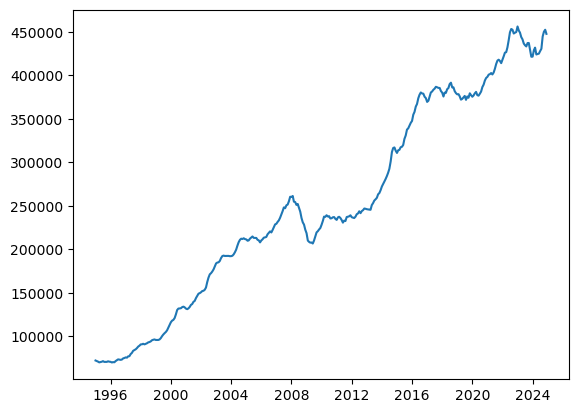

In [47]:
borough_line('Sutton')

In [53]:
# Pivot table for visualizations
London_cost = prop_nona.pivot_table(values = 'ave_cost', index = ['Boroughs','date'])
# Tried percent change month-by-month -- too much detail - need overview
#London_cost2 = London_cost.pct_change()
#print(London_cost2)

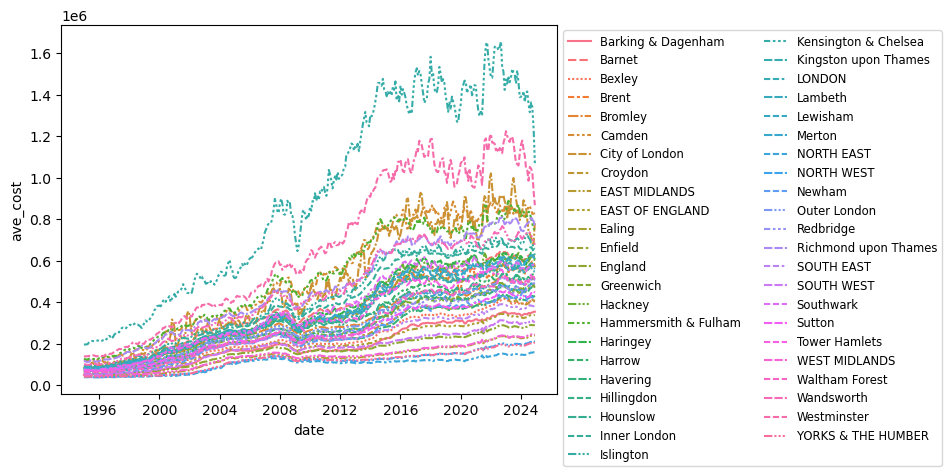

In [55]:
import seaborn as sns

sns.lineplot (x = 'date', y='ave_cost', data = London_cost, hue='Boroughs', style='Boroughs')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small', ncol=2)

plt.show()

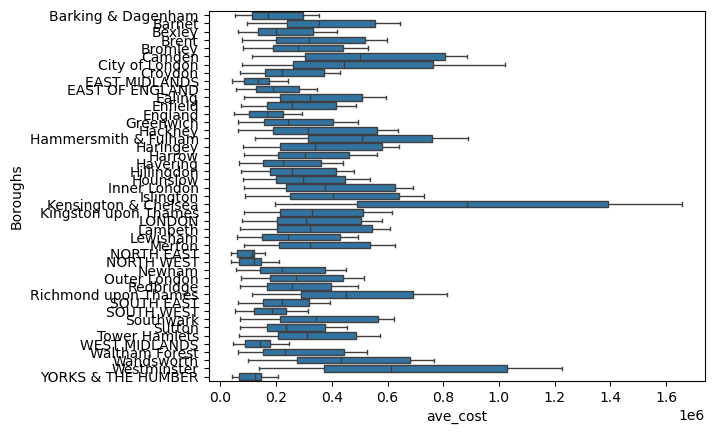

In [57]:
# I hope to learn how to change the width of the visual, change the text size, change the number format for ave_cost 
sns.boxplot (y = 'Boroughs', x='ave_cost', data = London_cost)
plt.show()

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules


4. Conclusion
What can you conclude? Type out your conclusion below. 

---
# the answer to the question depends on whether to compare minimum to maximum during the time period 
# or to compare the start date to the finish date
# and whether to compare percent increase or increase in pounds (GBP).

#### Comparing start date to finish date: 

# Greatest percentage increase. Hackney at 850 %. 
# Greatest increase GBP, City of London at 702,152.00

#### Comparing minimum to maximum values - if one timed the market perfectly: 

# Greatest percentage increase, City of London at 1241 %
# Greatest increase GBP, Kensington & Chelsea at 1,459,689.00


Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 

In [62]:
### Alternative solution : 
# Using the original data shape to answer the question

In [ ]:
print(properties.columns)

In [ ]:
# make a copy to drop some rows/columns and change data types
Borough_list = properties.copy()

Borough_l = Borough_list.drop(["Unnamed: 47",'Unnamed: 34', 'Unnamed: 37'], axis = 1)

Borough_l.drop([0], inplace = True)

Borough_l.shape

Borough_l.dtypes

In [ ]:
# function to change data type of a contiguous group of columns

def change_type (df, first_column, last_column, data_type):

    # get index numbers from column names
    index1 = df.columns.get_loc(first_column)
    index2 = df.columns.get_loc(last_column) + 1  # +1 for inclusive slicing

    # identify columns and change data type
    id_columns = df.columns[index1:index2]

    df[id_columns] = df[id_columns].astype(data_type)
    return df.dtypes
 

In [ ]:
change_type(Borough_l, 'City of London', 'England','float')

In [ ]:
# make a new dataframe of the output of .describe() to get min and max values for ave_cost
summary_costs = Borough_l.describe()

summary_costs = summary_costs.drop("Date", axis = 1)

# Calculate difference between min and max values
# print(summary_costs)
summ_costs = summary_costs.transpose()
# Drop extra columns; keep min and max  -- axis 1 is columns
summ_costs.drop(["count", 'mean', '25%', '50%', '75%', 'std'], axis = 1, inplace = True)

# summ_costs['Difference_min_max'] = summ_costs[max].sub(summ_costs['min']) # produced 0 instead of a value -Calculate the difference between min and max
# print(summ_costs.sort_values(by = 'Difference_min_max', ascending = False))

diff_in_GBP = summ_costs.diff(axis = 1)

diff_in_GBP.drop('min', axis = 1, inplace = True)
diff_in_GBP.rename(columns = {'max':'GBP Difference_min_to_max'},inplace = True)
print(diff_in_GBP.sort_values(by = 'GBP Difference_min_to_max', ascending = False))


In [ ]:
diff_in_GBP.columns  # why isn't there a column heading for the boroughs?

In [ ]:
# Percent difference min to max - for perfect market-timers
Pctchange_mm = summ_costs.pct_change(axis = 1)
#print(Pctdiff_mm)
Pctchange_mm.drop('min', axis = 1, inplace = True)
Pctchange_mm.rename(columns = {'max':'Percent Difference_min_to_max'},inplace = True)
print(Pctchange_mm.sort_values(by = 'Percent Difference_min_to_max', ascending = False))

In [ ]:
# calculate ave_cost change betweem start amd emd values

### identify and select the start and end columns; make a dataframe containing only those columns
row_indices = [0,-1]
Borough_cost1 = Borough_l.iloc[row_indices]


### make a new dataframe that excludes the Date column so pct_change can work across dataframe; contains only the start and finish values
borough_cost = Borough_cost1.drop("Date", axis = 1).transpose()
# borough_cost['foo']= borough_cost.diff(axis = 1) #ValueError: Cannot set a DataFrame with multiple columns to the single column foo

borough_cost.rename(columns = {1:"January 1995", 360:'December 2024'},inplace = True)

print(borough_cost)
# try to display the difference column beside the start and finish values - did not work 
# ser = pd.Series(GBP_start_to_finish['GBP Difference 1995 to 2024'])
# GBP_start_to_finish.insert(2,'GBP Diff 1995 to 2024', ser)

In [ ]:
# Difference in GBP from start (Jan 1995) to finish (Dec 2024)
GBP_sf = borough_cost.diff(axis = 1)
GBP_sf.rename(columns = {'December 2024':'GBP Difference 1995 to 2024'},inplace = True)
GBP_start_to_finish= GBP_sf.drop("January 1995", axis =1)
print(GBP_start_to_finish)

In [ ]:
###calculate percent change from January 1995 to December 2024  for each Borough across the Borough_cost1 dataframe; transpose to a sorted list
Change_Over_Time = borough_cost.pct_change(axis = 'columns')
#print(Change_Over_Time)
#drop the column that held the 1995 value
two_dec_change = Change_Over_Time.drop("January 1995", axis =1)
# Rename remaining column containing percent change
two_dec_change.rename(columns = {'December 2024':'Percent_Change 1995 to 2024'},inplace = True)
print(two_dec_change.sort_values(by = 'Percent_Change 1995 to 2024', ascending = False))
two_dec_change.columns

In [ ]:
# I can't find column names for the boroughs in these result tables -- so .merge() doesn't work to make consolidated tables 
# Percent_Change = borough_cost.merge(two_dec_change, on = (borough_cost[0]))
# maybe there's a way to make a series from another table and add it to this table?

In [ ]:
Borough_l["year"] = pd.DatetimeIndex(Borough_l['Date']).year
Borough_l["month"] =pd.DatetimeIndex(Borough_l['Date']).month
# Borough_l.dtypes
print(Borough_l.head())